In [1]:
from helpers.ddmSims.py_ddm_models import ddm_model1

from itertools import product
import pandas as pd
import seaborn as sns

In [2]:
d = .006
sigma = .08
rangeD = [0.005, 0.006, 0.007]
rangeSigma = [0.065, 0.08, 0.095]
trialsFileName=None
trialsPerCondition=250 
numTrials = 250
numThreads = 9
verbose = False

## Recovery with MLA

In [3]:
dataRTLeft, dataRTRight, dataHistLeft, dataHistRight, models, logLikelihoods = ddm_model1.recover_pars_mla(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName, numTrials=numTrials, 
                                                                                    numSimulations=10, binStep=100, maxRT=8000, numThreads=numThreads, verbose=verbose)

In [8]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['logLikelihood'] = logLikelihoods
df

,d,sigma,logLikelihood
0,0.005,0.065,-1147.684382
1,0.005,0.080,-1309.360734
2,0.005,0.095,-1462.771529
3,0.006,0.065,-1063.399888
4,0.006,0.080,-1284.170418
5,0.006,0.095,-1400.668349
6,0.007,0.065,-1156.828059
7,0.007,0.080,-1273.630589
8,0.007,0.095,-1469.689593


<AxesSubplot:xlabel='sigma', ylabel='d'>

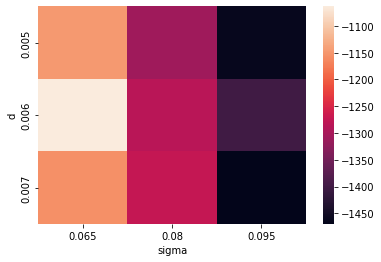

In [9]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'logLikelihood')
sns.heatmap(df)

## Recovery with PTA

In [ ]:
trials, models, likelihoods, posteriors = ddm_model1.recover_pars_pta(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName,
                                                  trialsPerCondition=trialsPerCondition, numThreads=numThreads, verbose=verbose)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['likelihood'] = [sum(likelihoods[k]) for k in likelihoods.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'likelihood')
sns.heatmap(df)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['posterior'] = [posteriors[k] for k in posteriors.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'posterior')
sns.heatmap(df)